In [2]:
from find_clusters import *
import yaml
import geopandas as gpd

Loading data

Running transformations for cleaning
    Applying transformation (1/2): convert-LICENSE TERM EXPIRATION DATE-to-datetime 
    LICENSE TERM EXPIRATION DATE -> LICENSE TERM EXPIRATION DATE
    Applying transformation (2/2): convert-DATE ISSUED-to-datetime 
    DATE ISSUED -> DATE ISSUED

    Creating 2 features on test-train set 1
    Creating 2 features on test-train set 1
    Balancing features for test-train set 1
['STATE_MA', 'CITY_EVANSTON', 'CITY_ADDISON', 'CITY_CHICAGO', 'CITY_GARY', 'CITY_ELMWOOD PARK', 'CITY_NORRIDGE', 'CITY_SKOKIE', 'CITY_MERRILLVILLE', 'CITY_VERNON HILLS', 'CITY_ROSELLE', 'CITY_MOUNT PROSPECT', 'STATE_NY', 'not_renewed_2yrs_x', 'CITY_BERWYN', 'CITY_CAROL STREAM', 'CITY_SUMMIT', 'CITY_CICERO', 'CITY_DALLAS', 'CITY_ELK GROVE', 'STATE_IN', 'STATE_OK', 'num_not_renewed_zip', 'CITY_ROLLING MEADOWS', 'CITY_ROCKTON', 'CITY_MELROSE PARK', 'STATE_TX', 'CITY_ELMHURST', 'not_renewed_2yrs_y', 'CITY_FOREST PARK', 'CITY_OAK PARK', 'CITY_LEMONT', 'CITY_NEW YORK

AttributeError: Unknown property column

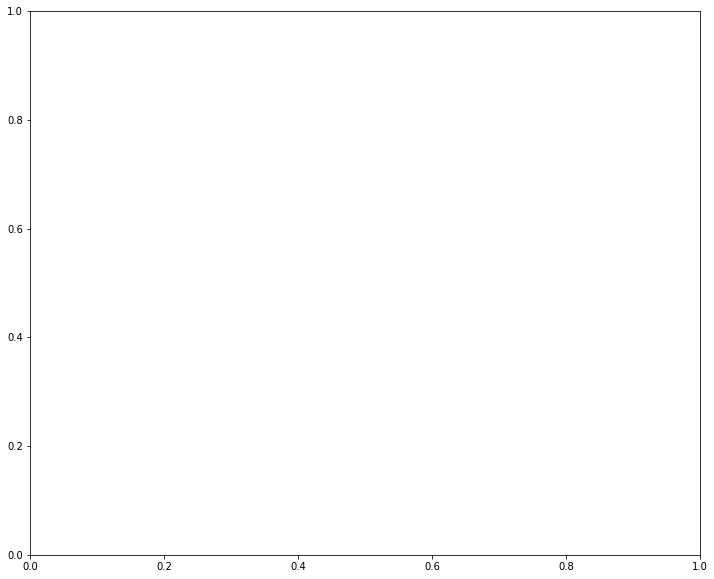

In [3]:
with open("analysis.yml", 'rb') as config_file:
        config = yaml.safe_load(config_file.read())

pipeline = create_classifer(config)

results = predict_failures(pipeline, config['k'])
geo_results = join_to_tracts(results, config).reset_index()

top_k_tracts = get_top_tracts(geo_results, config['num_tracts'])

Cook_tracts_shp = gpd.read_file(TRACT_SHAPEFILE)

gdf = map_top_tracts(Cook_tracts_shp, geo_results)

In [ ]:
Cook_tracts_shp.plot()

In [3]:
gdf = Cook_tracts_shp.merge(geo_results, how="left")

In [ ]:
gdf.plot(column = "label")

In [ ]:
gdf.shape

In [ ]:
gdf.columns

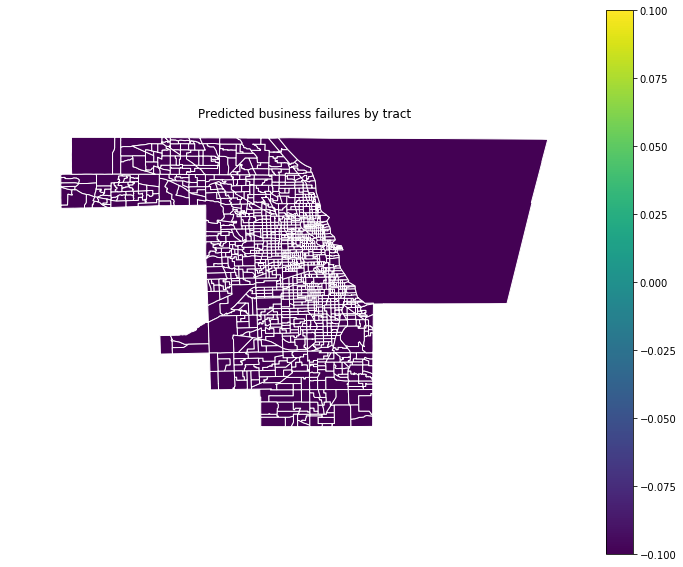

In [8]:
# Plot the map
ax3 = gdf.plot(column = "label",
                    edgecolor='white',
                    figsize=(12, 10),
                    legend=True)

# Some visual tweaks
plt.title('Predicted business failures by tract')
plt.axis('off')
plt.show()


In [12]:
gdf.sort_values("AWATER", ascending=False)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,ACCOUNT NUMBER,SITE NUMBER,score,label
694,17,031,990000,17031990000,9900,Census Tract 9900,G5020,S,0,1717072181,+41.9739391,-087.4002947,"POLYGON ((-87.741562 42.153226, -87.721762 42....",NaN,NaN,NaN,NaN
48,17,031,838800,17031838800,8388,Census Tract 8388,G5020,S,17863250,3802983,+41.6834042,-087.5740611,"POLYGON ((-87.60195400000001 41.684144, -87.60...",4636970.0,14.0,0.0,0.0
854,17,031,823801,17031823801,8238.01,Census Tract 8238.01,G5020,S,45146066,3751789,+41.6976101,-087.8774509,"POLYGON ((-87.914343 41.711853, -87.914293 41....",NaN,NaN,NaN,NaN
647,17,031,800400,17031800400,8004,Census Tract 8004,G5020,S,2969027,3498337,+42.1116252,-087.7290577,"POLYGON ((-87.744382 42.119333, -87.744175 42....",NaN,NaN,NaN,NaN
491,17,031,801200,17031801200,8012,Census Tract 8012,G5020,S,1947011,3492924,+42.0788722,-087.6848300,"POLYGON ((-87.71549 42.084939, -87.71475100000...",NaN,NaN,NaN,NaN
455,17,031,800100,17031800100,8001,Census Tract 8001,G5020,S,3167132,3084998,+42.1339745,-087.7477294,"POLYGON ((-87.77197200000001 42.15236, -87.771...",NaN,NaN,NaN,NaN
398,17,031,460100,17031460100,4601,Census Tract 4601,G5020,S,2964114,2514274,+41.7478345,-087.5367253,"POLYGON ((-87.554109 41.75181, -87.55407200000...",1712284.0,4.0,0.0,0.0
769,17,031,804201,17031804201,8042.01,Census Tract 8042.01,G5020,S,76718322,2456903,+42.1082692,-088.1883164,"POLYGON ((-88.238579 42.113425, -88.238444 42....",NaN,NaN,NaN,NaN
236,17,031,809400,17031809400,8094,Census Tract 8094,G5020,S,1009704,1649008,+42.0447842,-087.6725221,"POLYGON ((-87.688147 42.052141, -87.688096 42....",NaN,NaN,NaN,NaN
1172,17,031,081403,17031081403,814.03,Census Tract 814.03,G5020,S,324865,1436020,+41.8929908,-087.6209561,"POLYGON ((-87.624332 41.889027, -87.6243110000...",6062356.0,70.0,0.0,0.0


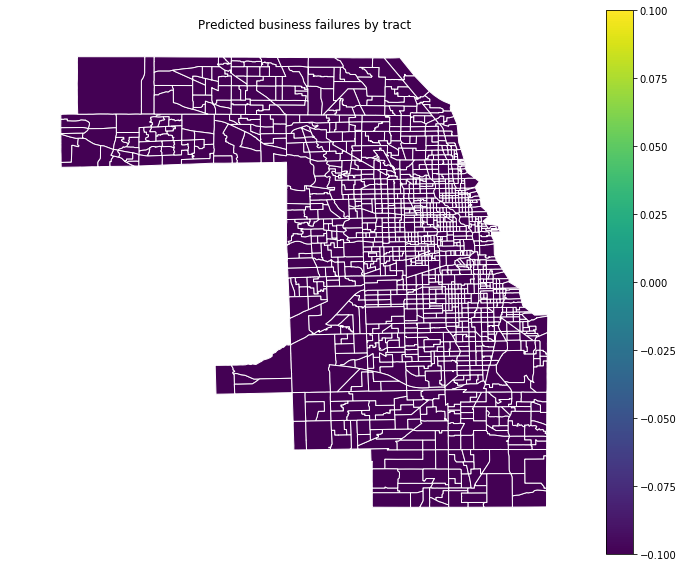

In [4]:
map_top_tracts(geo_results, Cook_tracts_shp)